In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Download SPY data since the beginnig of this year

In [80]:
spy = yf.download("SPY", start='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


Take a look at the data

In [81]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,472.160004,473.670013,470.489990,472.649994,471.186005,123623700
2024-01-03,470.429993,471.190002,468.170013,468.790009,467.337982,103585900
2024-01-04,468.299988,470.959991,467.049988,467.279999,465.832642,84232200
2024-01-05,467.489990,470.440002,466.429993,467.920013,466.470673,86060800
2024-01-08,468.429993,474.750000,468.299988,474.600006,473.129974,74879100


Graph of Close Prices this year

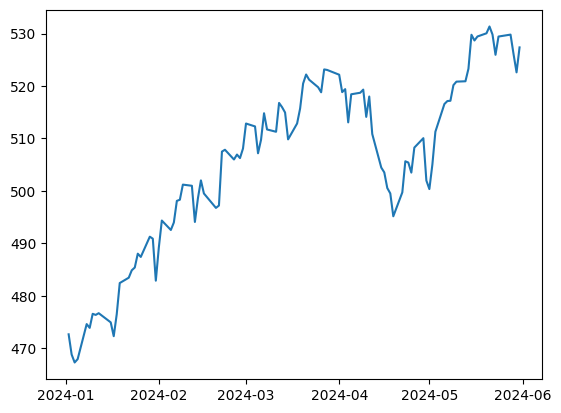

In [82]:
plt.plot(spy.index, spy.Close)
plt.show()

Lets do a 90 day forecast

In [114]:
forecast = 90
sims = 101
daily_return = (spy.Open / spy.Close)-1
mean_return = np.mean(daily_return)
sd_return = np.std(daily_return)

Start the data at the last value of the Close col

In [115]:
start_price = spy.Close.iloc[-1]

Generate 90 normally distributed observations. Need to do +1 so returns are above 1. Then take a product of all of the returns and the starting price

In [118]:
random.seed(101)
returns =1+np.random.normal(mean_return, sd_return, forecast)
price_sim = np.cumprod(returns)*start_price

Here is what one simulation looks like

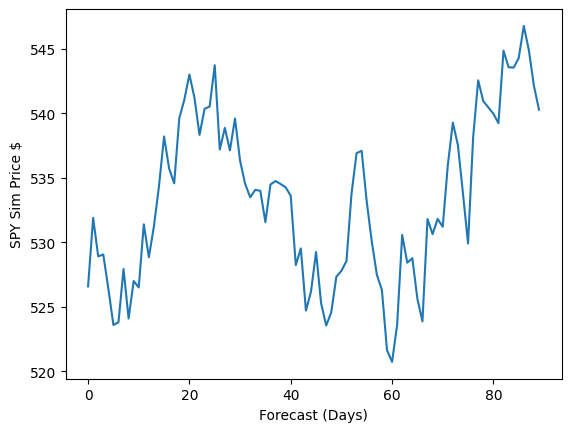

In [119]:
plt.plot(price_sim)
plt.ylabel("SPY Sim Price $")
plt.xlabel("Forecast (Days)")
plt.show()

Lets do 101 simulations. So make the data fram with that many rows and cols.

In [120]:
prices_df = pd.DataFrame(index=np.arange(forecast), columns=np.arange(sims))
prices_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then just fill each column the same way we did above.

In [160]:
for i in prices_df:
    returns = 1+np.random.normal(mean_return, sd_return, forecast)
    prices_df[i] = np.cumprod(returns)*start_price
prices_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,530.503937,525.771911,526.587798,528.104226,525.905821,528.471895,531.106701,522.382344,524.109797,526.837982,...,528.374709,526.669143,531.005217,532.554672,527.072202,526.826536,527.983235,525.482279,526.424017,532.069662
1,530.282265,528.005805,528.265410,530.799401,520.805193,522.380423,530.874912,526.217542,524.939276,529.021600,...,523.650863,536.202673,530.479923,534.811020,529.059049,529.712533,528.369559,525.478394,526.647857,527.955633
2,528.736191,529.293304,527.533271,530.058332,522.465201,520.635422,528.622775,524.642587,524.946737,527.707631,...,522.886609,531.617143,527.888804,532.866856,527.149231,523.716461,524.719598,524.127760,526.560723,525.902341
3,534.977250,529.983928,527.575259,526.757720,522.286868,523.492414,528.440427,526.264699,523.175041,528.464693,...,527.766738,537.585150,533.233664,533.447811,521.846701,528.946738,529.345038,521.436277,527.008504,520.061011
4,535.796145,528.294959,527.783001,528.825690,527.059781,526.945947,531.220600,526.907397,522.172930,529.128668,...,523.561541,538.906577,538.392140,535.431759,518.113082,527.717109,526.806115,517.984053,519.680764,519.692674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,497.920818,525.194022,523.780849,507.037635,550.498033,495.378856,507.057121,531.669438,495.307833,560.794635,...,493.562818,535.295653,535.969449,506.110187,518.875668,549.513845,512.214050,506.667962,492.341671,525.866104
86,495.720459,520.250488,524.102709,504.207944,552.046585,498.948502,504.482758,532.785684,496.354965,562.564710,...,496.120508,536.729845,534.029063,504.887809,514.718215,551.352807,511.558507,507.872129,491.925863,525.348636
87,494.977969,519.861583,524.045023,503.826467,553.156529,497.103363,503.536397,531.728436,495.831946,560.390687,...,495.948478,537.029361,539.134183,503.150090,509.642818,554.018643,509.890483,509.929078,490.158729,525.897338
88,498.241554,516.098292,523.224095,504.620207,552.657907,501.166470,511.459894,532.951887,491.527717,563.501428,...,493.930349,538.428004,539.796242,504.707731,508.737396,549.614916,507.505080,508.207493,485.851033,523.204054


Just plot 20 of these lines because it just gets harder and harder to see whats going on.

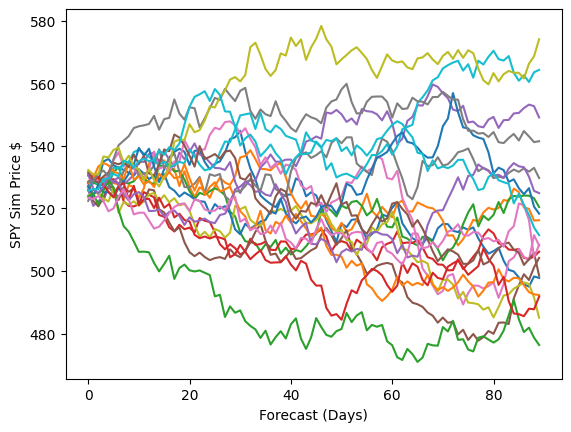

In [205]:
for i in range(20):
    plt.plot(prices_df[i])
plt.ylabel("SPY Sim Price $")
plt.xlabel("Forecast (Days)")
plt.show()

Make a new list of the simulated returns after 90 days

In [188]:
total_returns = []

In [189]:
for i in prices_df:
    final_return = (prices_df.iloc[-1, i] - prices_df.iloc[0,i]) / prices_df.iloc[0, i]
    total_returns.append(final_return)

Plot a histogram of those returns

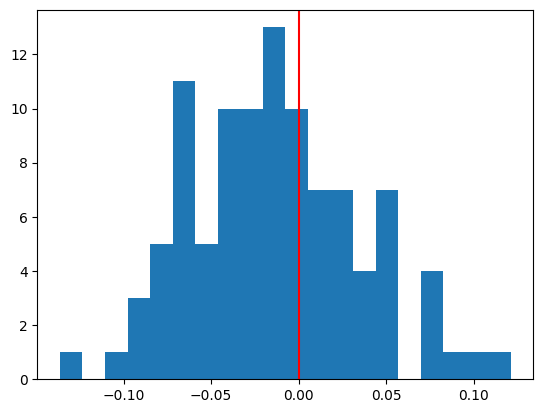

In [190]:
plt.hist(total_returns, bins=20)
plt.axvline(0, color='red')
plt.show()

Function to see what proportion of returns are less than 0

In [206]:
def proportion_less_than_zero(values):
    count_less_than_zero = sum(1 for x in values if x < 0)
    total_count = len(values)
    proportion = count_less_than_zero / total_count
    return round(proportion, 3)

In [207]:
prop_less_0 = proportion_less_than_zero(total_returns)
print("Proportion of returns less than 0:", prop_less_0)

Proportion of returns less than 0: 0.614


Now, we can get the index of stats we care about, then just plot those lines

In [196]:
max = np.max(total_returns)
min = np.min(total_returns)
med = np.median(total_returns)
max = total_returns.index(max)
min = total_returns.index(min)
med = total_returns.index(med)

The final graph

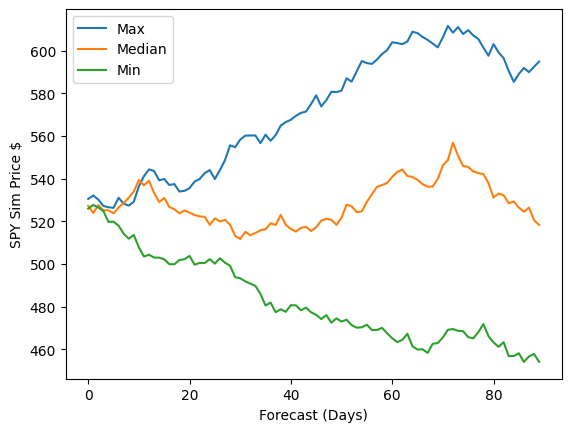

In [200]:
plt.plot(prices_df[max], label = "Max")
plt.plot(prices_df[med], label = "Median")
plt.plot(prices_df[min], label = "Min")
plt.ylabel("SPY Sim Price $")
plt.xlabel("Forecast (Days)")
plt.legend()
plt.show()